## Data Visualization

This notebook is an attempt to visualize our model which help us quickly indentify the most representative reviews of the product.

Since we have to embed all the review contents into Universal Sentence Encoder as high dimensional vectors in order to locate the semantic textual similarity. It would be challenging to visualize that 512-dimensional vectors. Therefore, with PCA, we can reduce the high dimensionality of the vectors and transfom them into the visualizable forms which are two-dimensional vectors to plot.

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import tensorflow_hub as hub

%matplotlib inline
plt.rcParams['figure.figsize']=(12.0, 9.0)
%config InlineBackend.figure_format='retina'



[Link to download USE from TensorFlow Hub local source](https://tfhub.dev/google/universal-sentence-encoder/4)




In [2]:
# Loads Universal Sentence Encoder from TensorFlow Hub online source
#embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

# Loads Universal Sentence Encoder from TensorFlow Hub local source

embed = hub.load("/Users/data/universal-sentence-encoder_4")


In [3]:
# Loads the original dataset

df = pd.read_csv(r'/Users/data/iherb_best_selling_products_clean_dataset.csv') 

df.head(5)

,item_image_link,item_brand,item_name,item_description,item_price,total_rating,review_contents,individual_rating,product_helpful,product_not_helpful
0,https://s3.images-iherb.com/cgn/cgn00931/l/115...,California Gold Nutrition,"Gold C, Vitamin C, 1,000 mg, 60 Veggie Capsules","California Gold Nutrition Gold C™, 1000 mg, Fe...",6.56,4.7,I bought it because of good caustic vitamin C ...,5,3136,64
1,https://s3.images-iherb.com/cgn/cgn00931/l/115...,California Gold Nutrition,"Gold C, Vitamin C, 1,000 mg, 60 Veggie Capsules","California Gold Nutrition Gold C™, 1000 mg, Fe...",6.56,4.7,With such preparation as ascorbic acid or vita...,5,2271,125
2,https://s3.images-iherb.com/cgn/cgn00931/l/115...,California Gold Nutrition,"Gold C, Vitamin C, 1,000 mg, 60 Veggie Capsules","California Gold Nutrition Gold C™, 1000 mg, Fe...",6.56,4.7,I bought it for a long time without any doubt....,1,1597,50
3,https://s3.images-iherb.com/cgn/cgn00931/l/115...,California Gold Nutrition,"Gold C, Vitamin C, 1,000 mg, 60 Veggie Capsules","California Gold Nutrition Gold C™, 1000 mg, Fe...",6.56,4.7,I bought this vitamin at a promotion price I p...,5,706,3
4,https://s3.images-iherb.com/cgn/cgn00931/l/115...,California Gold Nutrition,"Gold C, Vitamin C, 1,000 mg, 60 Veggie Capsules","California Gold Nutrition Gold C™, 1000 mg, Fe...",6.56,4.7,very cool product I recommend it to,5,595,0


<img src = "https://docs.google.com/uc?export=download&id=1xFdWjxVs0vjFNeQgKzVifSHUHQhqY6N_" />
product "Vitamin D3 + K2, Soy-Free, 125 mcg (5000 IU), 60 VegCaps"

In [4]:
# Filtering out other products and keeping only the review contents of product "Vitamin D3 + K2, Soy-Free, 125 mcg (5000 IU), 60 VegCaps" :

product_review = df['review_contents'].loc[df['item_name'] == 'Vitamin D3 + K2, Soy-Free, 125 mcg (5000 IU), 60 VegCaps'].reset_index(drop=True).copy()

# Set numbers for clusters (k) and numbers of review to display (n):

k= 4
n= 5

# Vectorize the "product_review":
review_vectors = embed(product_review)

# Instantiate the model
kmeans_model = KMeans(n_clusters=k, random_state=24)

# Fit the model
kmeans_model.fit(review_vectors)

review_vectors.shape

TensorShape([142, 512])

#### We have 142 reviews for this product as 142 data points to visualize.

In order visualize the all the data points easily, we have to use PCA to reduce the original 512-dimensional vectors with the 3 principal components.

In [5]:
# Instantiate PCA transformer with 3 dimensions:
pca = PCA(n_components=3)

# Fit and transform review vectors:
pca_review = pca.fit_transform(review_vectors)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09727007 0.05949697 0.03692067]


In [6]:
# Create a dataframe from our transformed review vectors:
x = pd.DataFrame(pca_review, columns=['pca-one','pca-two','pca-three'])

# Add column indicating the cluster number of each sentence (adding 1 so that the first cluster is number 1, not 0)
x['Cluster'] = kmeans_model.labels_ + 1


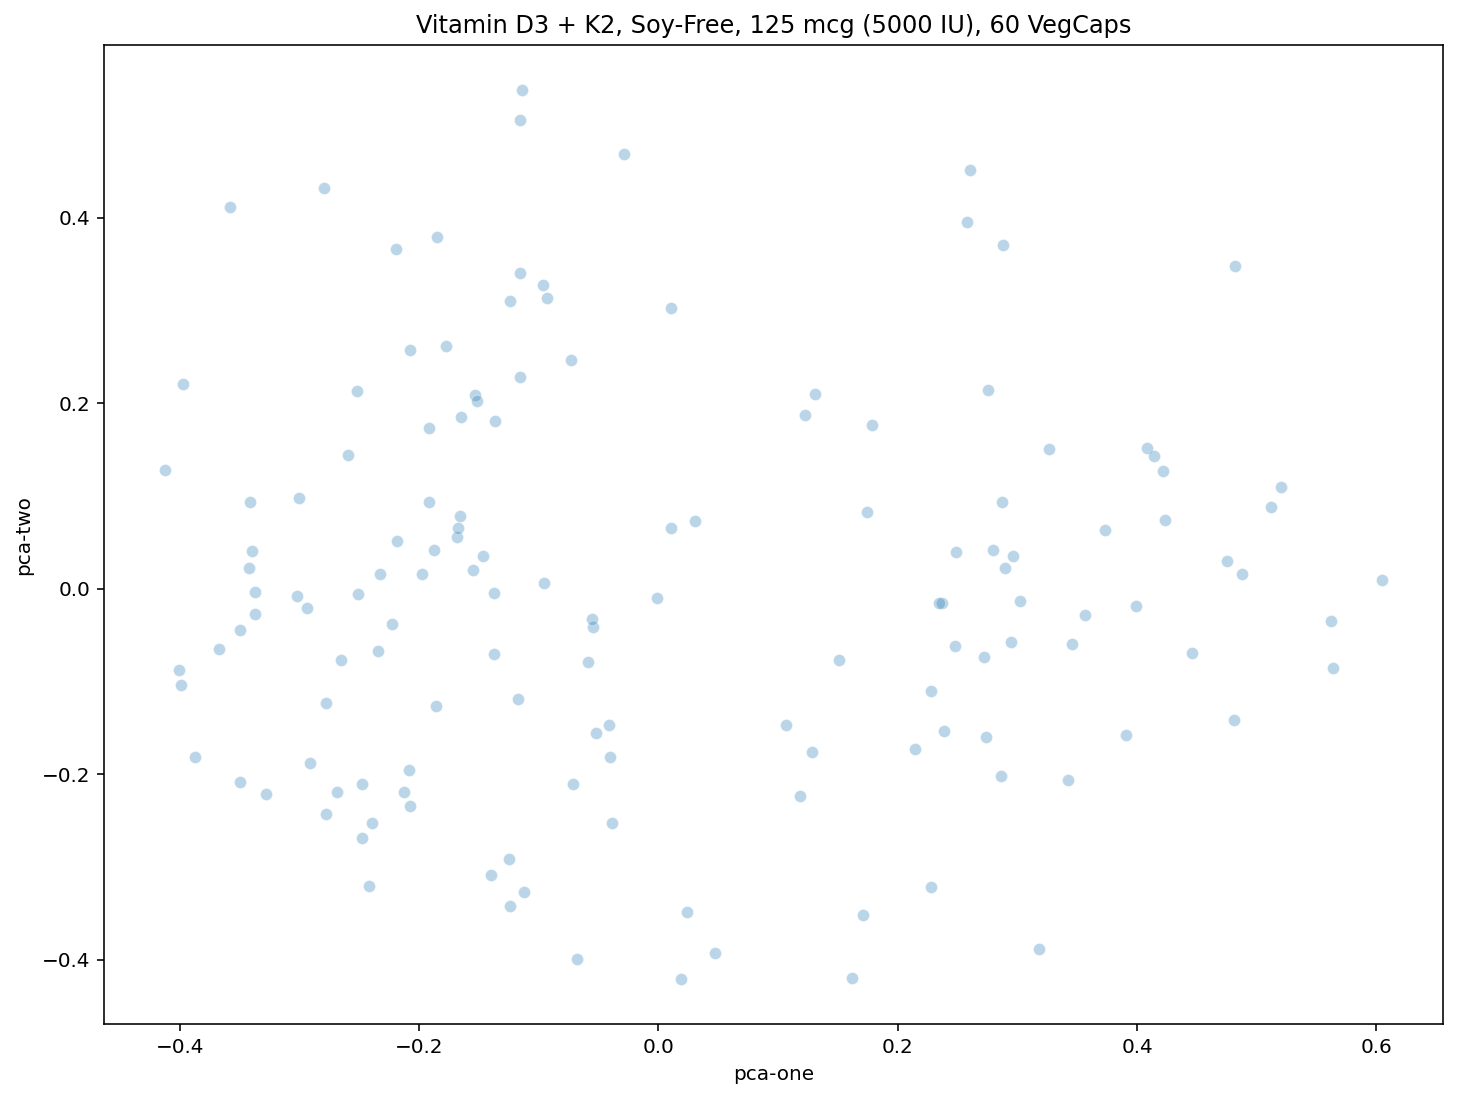

In [7]:
# Plot our full undifferentiated dataset
plt.figure()
sns.scatterplot(x='pca-one', y='pca-two', data = x, alpha=0.3)
plt.title('Vitamin D3 + K2, Soy-Free, 125 mcg (5000 IU), 60 VegCaps')
#plt.savefig('viz/undifferentiated_plot_gg.png', dpi=200)
plt.show()

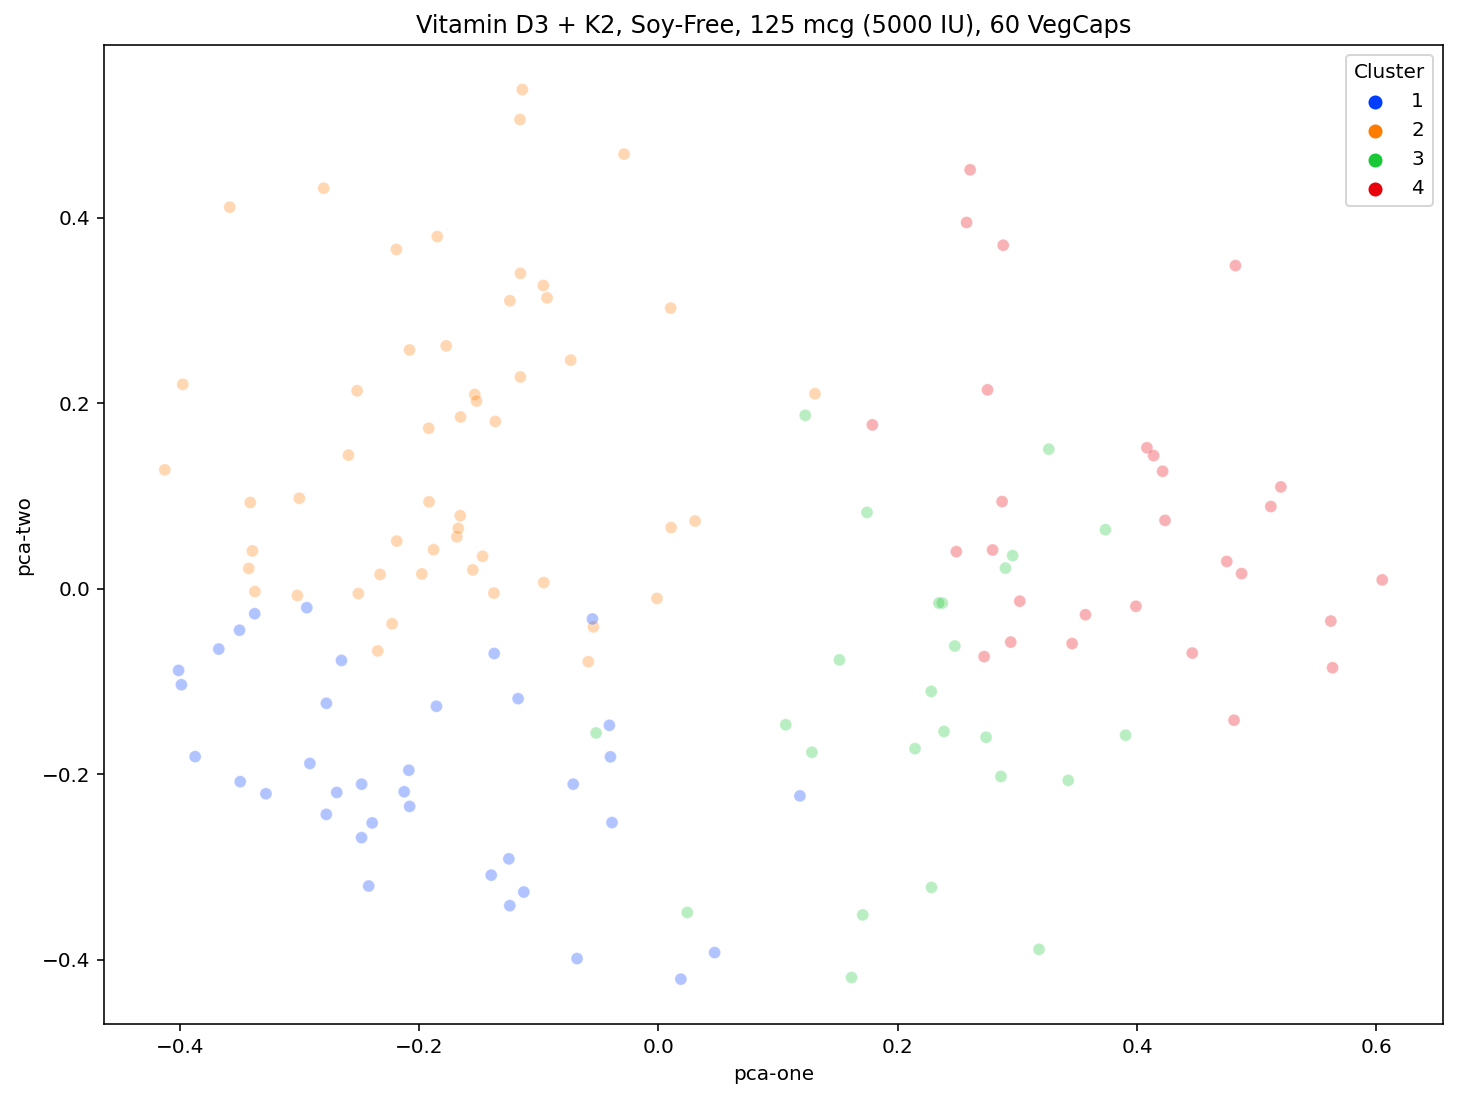

In [8]:
# Plot our full undifferentiated dataset

plt.figure()
sns.scatterplot(x='pca-one', y='pca-two', data = x, hue= x['Cluster'],
               palette=sns.color_palette("bright" , k ), alpha=0.3,
               legend="full")

plt.title('Vitamin D3 + K2, Soy-Free, 125 mcg (5000 IU), 60 VegCaps')
#plt.savefig('viz/full_plot_gg.png', dpi=200)
plt.show()

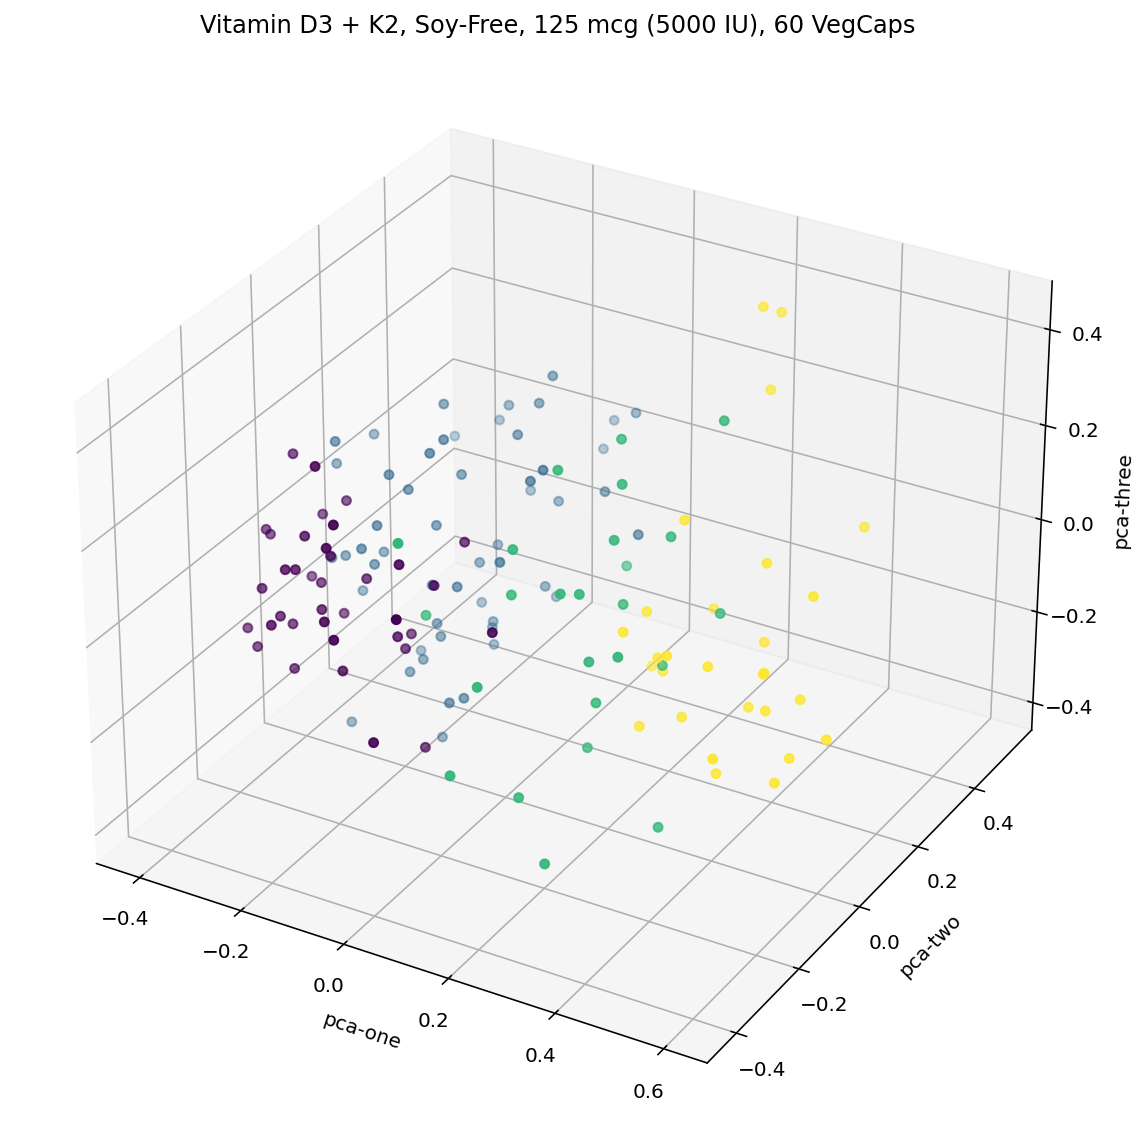

In [9]:
# 3D-version of the same plot:

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=x["pca-one"], 
    ys=x["pca-two"], 
    zs=x["pca-three"], 
    c=x["Cluster"])

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.title('Vitamin D3 + K2, Soy-Free, 125 mcg (5000 IU), 60 VegCaps')
#plt.savefig('viz/full3D_plot_gg.png', dpi=200)
plt.show()



In [10]:
def get_clusters(product_review, review_vectors, k, n):
    '''
    Function to extract n of the most representative review contents from k clusters, with density scores
    '''
    
    # Instantiate the model
    kmeans_model = KMeans(n_clusters=k, random_state=24)

    # Fit the model
    kmeans_model.fit(review_vectors);

    # Set the number of cluster centre points to look at when calculating density score
    centre_points = int(len(product_review) * 0.03)
    
    # Initialize list to store mean inner product value for each cluster
    cluster_density_scores = []
    
    # Initialize dataframe to store cluster centre sentences
    df = pd.DataFrame()

    # Loop through number of clusters
    for i in range(k):

        # Define cluster centre
        centre = kmeans_model.cluster_centers_[i]

        # Calculate inner product of cluster centre and review vectors
        inner_product_cluster = np.inner(centre, review_vectors)

        # Find the sentences with the highest inner products
        top_indices = pd.Series(inner_product_cluster).nlargest(n).index
        top_sentences = list(product_review[top_indices])
        
        centre_ips = pd.Series(inner_product_cluster).nlargest(centre_points)
        density_score = round(np.mean(centre_ips), 5)
        
        # Append the cluster density score to master list
        cluster_density_scores.append(density_score)

        # Create new row with cluster's top 10 sentences and density score
        new_row = pd.Series([top_sentences, density_score])
        
        # Append new row to master dataframe
        df = df.append(new_row, ignore_index=True)

    # Rename dataframe columns
    df.columns = ['reviews', 'density']

    # Sort dataframe by density score, from highest to lowest
    df = df.sort_values(by='density', ascending=False).reset_index(drop=True)
    
    # Loop through number of clusters selected
    for i in range(k):
        
        # Save density / similarity score & sentence list to variables
        sim_score = round(df.loc[i]["density"], 3)
        bundles = df.loc[i]['reviews'].copy()
        
        print(f'Cluster #{i+1} sentences (density score: {sim_score}):\n')
        print(*bundles, sep='\n''\n')
        print('\n')
        
    model_density_score = round(np.mean(cluster_density_scores), 5) # check the mean of the density scores through all the clusters
    
    print(f'Model density score: {model_density_score}')

In [11]:
get_clusters(product_review, review_vectors, k=4, n=5)

Cluster #1 sentences (density score: 0.528):

It first the doctor prescribed 10000 units to drink because according to the analyze it was very low. When I raised my vitamin D thanks to this particular vitamin in combination with other dietary supplement and meditations I actually got more energy. Now I drink one capsule every morning after breakfast to maintain my vitamin D.

Everyone around said that in Russia everyone especially in winter should drink vitamin D. But I decided not to believe in a word and check my level of vitamin D in the laboratory. The result was so-so though not quite critical - 38. I decided to raise D to the maximum value because it is necessary for bones hair immunity cancer prevention good mood and much more. The ordered this drug and drank it for 2 months basically drank 2 tablets a day sometimes 4 you can take such doses every day and only if you passed the tests and you know exactly what vitamin D you have where to raise. 2 month new test results showed 90.

#### CODE REFERENCES:

[Visualising high-dimensional datasets using PCA and t-SNE in Python](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b)